In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
df['target'] = iris.target

In [35]:
import matplotlib.pyplot as plt

In [9]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


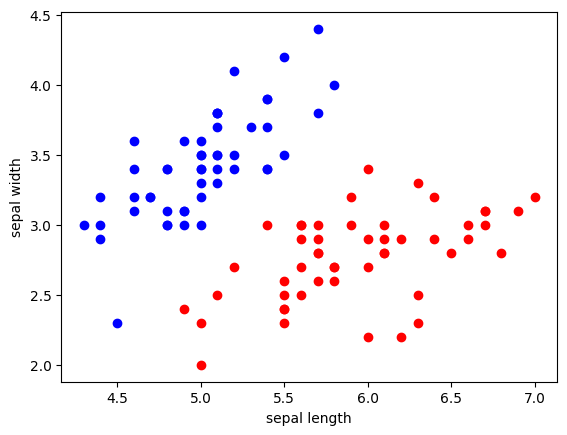

In [15]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'blue')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split as tts

In [28]:
X_train, X_test, y_train, y_test = tts(df.drop(['target'], axis = 1), df.target, test_size = 0.2, random_state = 1)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # if we plot a point in the graph, then the max. nearest points
                                        # in the total n_neighbors points is the group in which the particular point will belong
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [34]:
y_pre = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'truth')

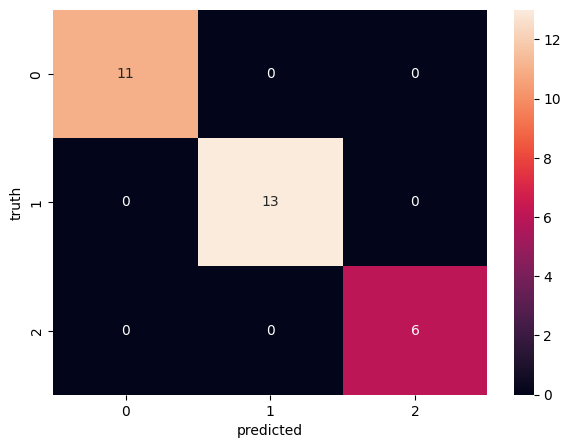

In [38]:
import seaborn as sn
plt.figure(figsize= (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

